# Ridge regularization showcase

This notebook explores Ridge regression (analytic solution) across a range of regularization strengths (lambda) for a fixed polynomial degree.
It computes test MSE and R^2 for each lambda and saves plots to the `figures` folder.


In [4]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot
from Functions.bootstrap import *

In [5]:
np.random.seed(1)

n_points = 100

x_train, x_test, y_train, y_test = generateData(n_points, noise = 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()

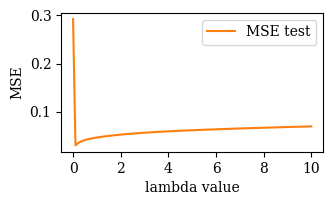

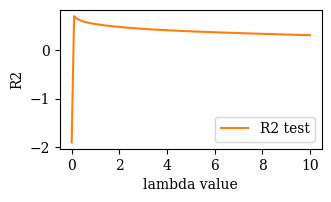

In [6]:


n_degree = 16

noIntercept = False
X_train = featureMat(x_train, n_degree, noIntercept=noIntercept)
X_test = featureMat(x_test, n_degree, noIntercept=noIntercept)

lambdas = np.linspace(0, 10, 100)

MSEs_test = np.zeros(len(lambdas), dtype=float)
R2s_test = np.zeros(len(lambdas), dtype=float)

for i, lambd in enumerate(lambdas):


    theta = theta_analytic_Ridge(X_train, y_train, lambd = lambd)
    y_test_pred = X_test @ theta

    MSE_test = MSE(y_test, y_test_pred)
    R2_test = R2(y_test, y_test_pred)

    MSEs_test[i] = MSE_test
    R2s_test[i] = R2_test


plot(
    nGraphs = 1,
    x_axis_array = lambdas,
    y_features = [MSEs_test],
    y_feature_label = ['MSE test'],
    foldername = 'figures',
    figurename = f'Ridge_lambda_d6_OLS',
    x_label = 'lambda value',
    y_label = 'MSE',
    title = '',
    x_integer_entries = False,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = False
)


plot(
    nGraphs = 1,
    x_axis_array = lambdas,
    y_features = [R2s_test],
    y_feature_label = ['R2 test'],
    foldername = 'figures',
    figurename = f'Ridge_lambda_d6_R2',
    x_label = 'lambda value',
    y_label = 'R2',
    title = '',
    x_integer_entries = False,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = False
)